Classifying Loan Status Using Decision Trees
    Dataset: 
Lending Club Loan Data
    Preprocessing Steps:
Handle missing values if any.
Encode categorical variables (e.g., one-hot encoding for loan grade, sub-grade, etc.).
Standardize numerical features.
    Task: 
Implement a decision tree classifier to classify loan status and evaluate the model using accuracy and ROC-AUC.


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data=pd.read_csv('LendingClubLoan.csv')
data.head()

,Unnamed: 0,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,1,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,2,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,3,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,4,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,5,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


In [7]:
data.isna().sum()

Unnamed: 0                             0
emp_title                            833
emp_length                           817
state                                  0
homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                        24
annual_income_joint                 8505
verification_income_joint           8545
debt_to_income_joint                8505
delinq_2y                              0
months_since_last_delinq            5658
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
months_since_90d_late               7715
current_accounts_delinq                0
total_collection_amount_ever           0
current_installm

In [8]:
numerical_features = ['annual_income', 'debt_to_income', 'annual_income_joint', 'balance', 'paid_total', 'paid_principal', 'paid_interest', 'paid_late_fees']
categorical_features = ['emp_title', 'emp_length', 'state', 'homeownership', 'verified_income', 'verification_income_joint', 'sub_grade', 'issue_month', 'initial_listing_status', 'disbursement_method']


In [9]:
numerical_transformer=Pipeline(steps=[
('Imputer',SimpleImputer(strategy='median')),
('scaler',StandardScaler())
])

In [10]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [11]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [12]:
X = data.drop('loan_status', axis=1)
y = data['loan_status']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

In [15]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('Imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['annual_income',
                                                   'debt_to_income',
                                                   'annual_income_joint',
                                                   'balance', 'paid_total',
                                                   'paid_principal',
                                                   'paid_interest',
                                                   'paid_late_fees']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['emp_title', 'emp_length',
                                                   'state', 'homeownership',
                                                   'verified_income',
                                                   'verification_income_joint',
                                                   'sub_grade', 'issue_month',
                                                   'initial_listing_status',
                                                   'disbursement_method'])])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

Accuracy: 0.977


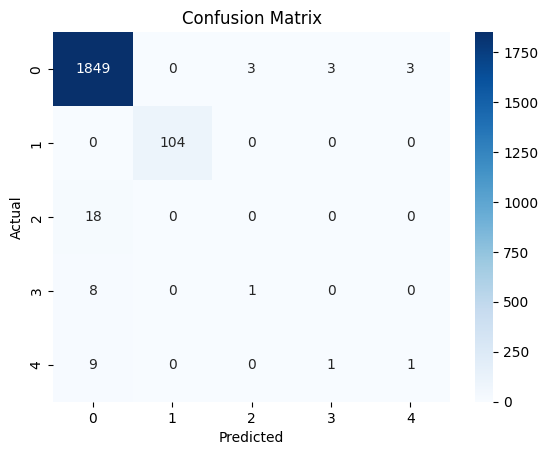

In [16]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
